## Nonlinear Support Vector Machine

In [3]:
load(url("http://www-stat.stanford.edu/~tibs/ElemStatLearn/datasets/ESL.mixture.rda")) #Extract information from websites
names(ESL.mixture)

[1] "x"        "y"        "xnew"     "prob"     "marginal" "px1"      "px2"     
[8] "means"

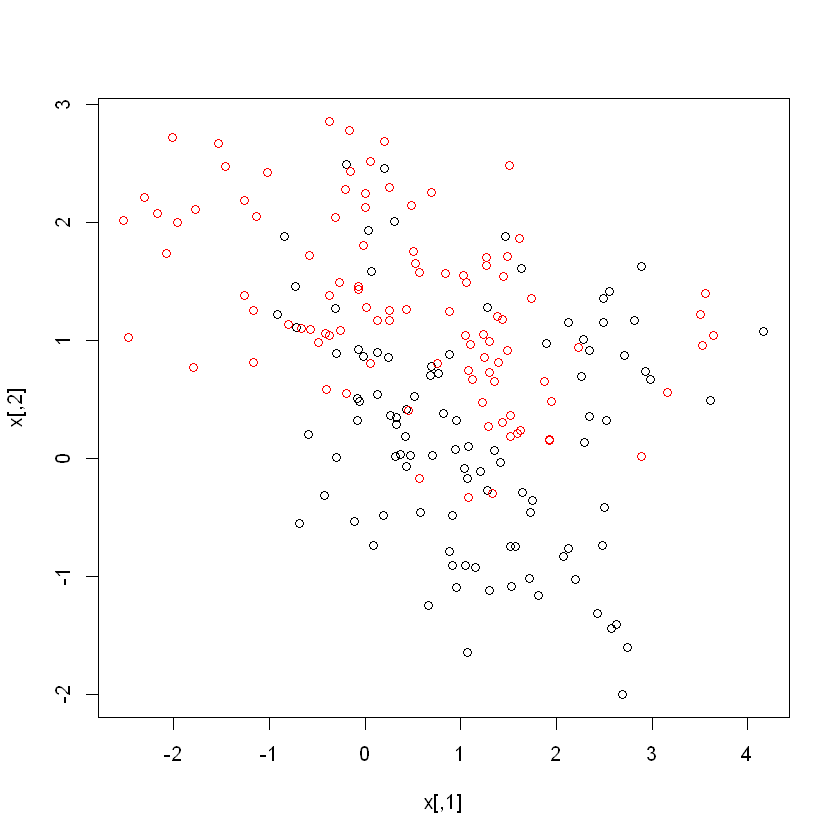

In [7]:
x <- ESL.mixture$x
y <- ESL.mixture$y
plot(x,col = y+1)

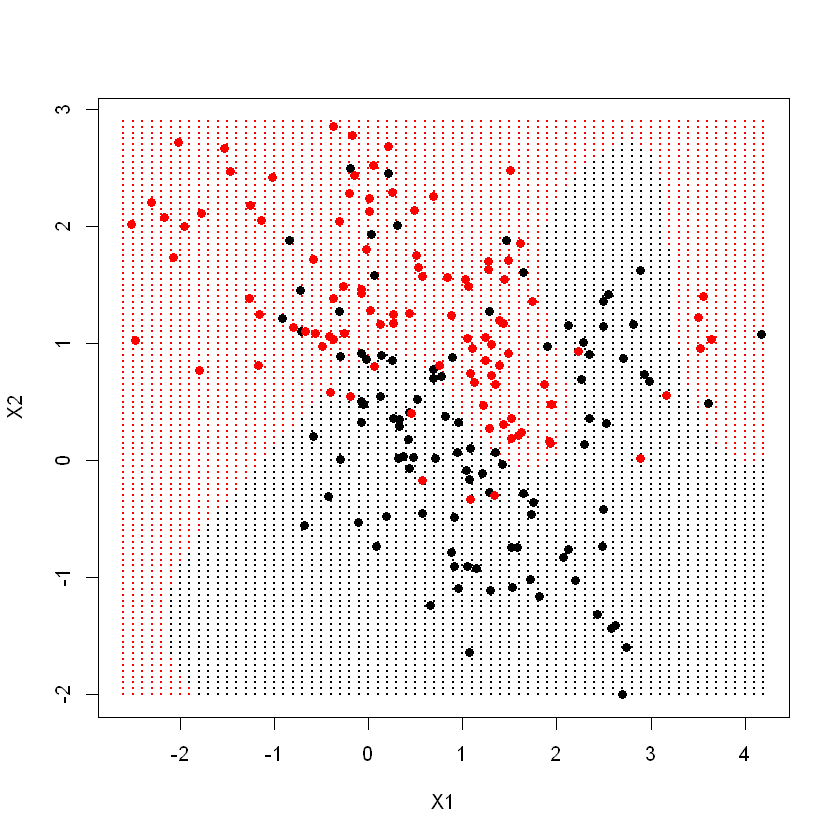

In [14]:
library(e1071)
dat <- data.frame(y = as.factor(y),x)
svmfit <- svm(y~.,data = dat, kernel = "radial", scale = FALSE, cost = 5)
xgrid <- expand.grid(X1 = ESL.mixture$px1,X2 = ESL.mixture$px2)
ygrid <- predict(svmfit,xgrid)
plot(xgrid,col = as.numeric(ygrid),cex = 0.2, pch = 20)
points(x, col = y+1, pch = 19)

Plotting the contour of the decision boundary and the true classification boundary ("Bayes Decision Boundary").

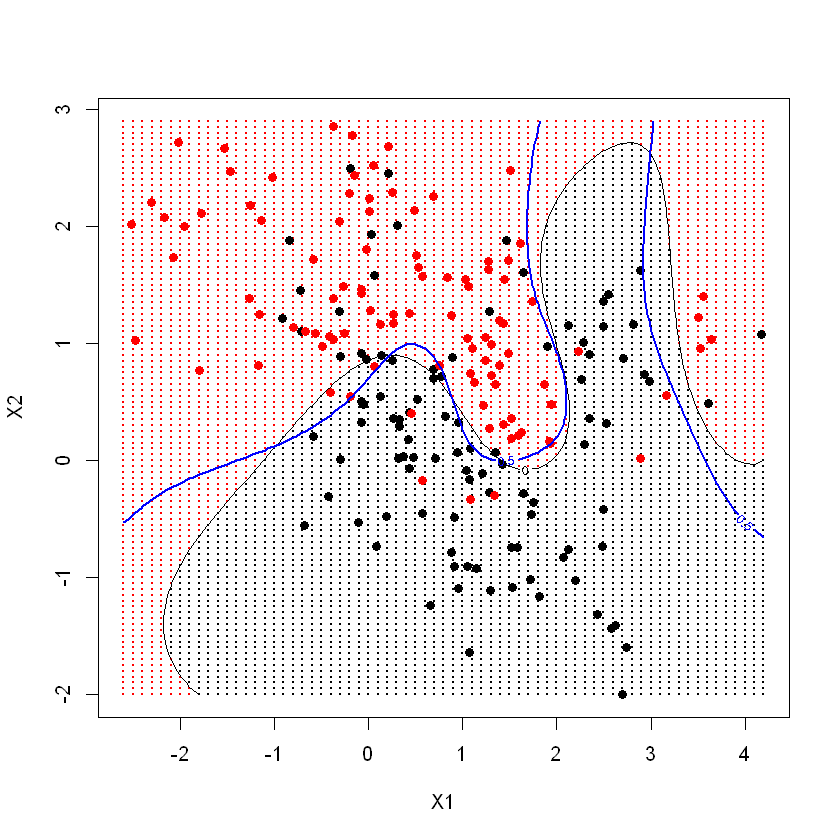

In [19]:
func <- predict(svmfit,xgrid, decision.values = TRUE) # We need the actual function not just the classification
func <- attributes(func)$decision

plot(xgrid,col = as.numeric(ygrid),cex = 0.2, pch = 20)
points(x, col = y+1, pch = 19)
# Decision boundary obtained from the SVM
contour(ESL.mixture$px1,ESL.mixture$px2, matrix(func,69,99), level = 0, add = TRUE) #69 and 99 dimensions of the px1 and px2 vectors

#Bayes Decision Boundary
contour(ESL.mixture$px1,ESL.mixture$px2, matrix(ESL.mixture$prob,69,99), level = 0.5, add = TRUE, col = "blue",lwd = 2)

Notice that the SVM boundary is close to the true decision boundary in those areas where there is more data to do the classification